<table width="100%">
    <td align="left">
        <a target="_blank", href="https://www.up.pt/fcup/en/">
            <img src="https://divulgacao.iastro.pt/wp-content/uploads/2023/03/FCUP_logo-print_blcktransp_600ppi.png" width="90px" height="90px" style="padding-bottom:5px;"/>
        </a>
    </td>
    <td>
        <a target="_blank", href="https://www.iastro.pt/">
            <img src="https://divulgacao.iastro.pt/wp-content/uploads/2018/03/IA_logo_bitmap-rgbblack-1200px-388x259.png" width="90px" height="90px" style="padding-bottom:5px;"/>
        </a>
    </td>
    <td align="center">
        <a target="_blank" href="https://colab.research.google.com/github/jbrinchmann/MLD2025/blob/main/Notebooks/MLD2025-03-regression.ipynb">
           <img src="https://tinyurl.com/3mm2cyk6"  width="90px" height="90px" style="padding-bottom:5px;"/>Run in Google Colab
        </a>
    </td>
<td align="center"><a target="_blank" href="https://github.com/jbrinchmann/MLD2025/blob/main/Notebooks/MLD2025-03-regression.ipynb">
<img src="https://tinyurl.com/25h5fw53"  width="90px" height="60px" style="padding-bottom:0px;"  />View Source on GitHub</a></td>
</table>

# Multivariate data visualisation and regression

Here we will try out both visualisation techniques and regression methods. This uses `astroML` optionally for downloading data. If you uncomment that part you need to install `astroML` on Colab using e.g.
```
!pip install astroML
```

In [12]:

from astropy.table import Table
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [13]:
# This sets the default appearance of seaborn and its colour palette
sns.set(style="white")
sns.set_palette('colorblind')

There are three options to get the data we need here: 

 - a) Using astroML and direct download from the net
 - b) Storing the file in advance, downloaded either from the cloned GitHub repository or using the method above.
 - c) Downloading from Github using wget 

Option c) is the only easy option for working on Colab (you can also load from your Google Drive but that is somewhat more involved), b) is the only option for offline work and a) is fine but a bit unnecessary if you run the notebook many times.

In [14]:
# If you have good internet connection and have astroML installed you can get the data cleanly this way:
# from astroML.datasets import fetch_sdss_sspp
#d = fetch_sdss_sspp()
#t = Table(d)

In [15]:
# But if you prefer not to you can do this if the file is stored locally: 
# t = Table().read("star_properties.fits")

In [16]:
# Or this if you are on Colab
!wget --quiet -O star_properties.fits 
t = Table().read("star_properties.fits")

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [17]:
t

ra,dec,Ar,upsf,uErr,gpsf,gErr,rpsf,rErr,ipsf,iErr,zpsf,zErr,pmL,pmB,pmErr,mjd,plate,fiber,SNR,FeH,FeHErr,Teff,TeffErr,logg,loggErr,alphFe,alphFeErr,radVel,radVelErr
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
49.627502,-1.0417559,0.2,17.619,0.018,16.177,0.019,15.563,0.02,15.362,0.023,15.249,0.021,4.87,-9.67,2.73,52932.0,1515.0,208.0,56.952,-0.49078,0.030473,5480.2,32.202,2.7466,0.86567,0.16446,0.05,-20.27,1.2338
40.27209,-0.6425011,0.085,19.241,0.034,17.526,0.02,16.84,0.017,16.613,0.019,16.492,0.018,-0.39,3.15,3.03,52591.0,1070.0,114.0,28.509,-0.45424,0.074101,5166.1,23.374,4.4887,0.12392,0.28739,0.0086588,-8.2099,1.5169
54.68342,0.2169363,0.248,20.869,0.094,19.574,0.023,19.068,0.022,18.836,0.019,18.738,0.054,6.8,10.59,3.85,54792.0,3156.0,413.0,22.855,-0.73413,0.0645,5573.2,74.674,4.1013,0.10648,0.38164,0.018238,-8.8528,2.8615
54.776966,0.2233347,0.281,19.734,0.042,18.335,0.022,17.663,0.022,17.446,0.021,17.247,0.033,2.47,2.55,3.26,54792.0,3156.0,409.0,52.957,-0.47688,0.041891,5391.3,23.108,4.3046,0.12903,0.22487,0.011503,-28.795,1.2334
55.106388,0.219215,0.24,20.606,0.081,19.061,0.022,18.515,0.022,18.301,0.02,18.131,0.033,-1.54,3.1,3.46,52619.0,1062.0,393.0,13.196,-0.44552,0.054758,5665.5,80.054,4.0536,0.20939,0.020483,0.016306,58.491,3.7639
55.743725,0.2163378,0.239,20.138,0.068,18.767,0.02,18.195,0.018,17.894,0.018,17.783,0.027,5.83,3.02,3.53,54792.0,3156.0,534.0,42.435,-1.2327,0.074413,5362.5,56.773,2.0169,0.14367,0.028524,0.025851,-126.55,2.1647
57.512115,0.0848679,0.647,18.81,0.029,17.644,0.018,17.107,0.017,16.852,0.018,16.73,0.019,14.28,-9.1,3.03,52930.0,1243.0,473.0,38.765,-1.3285,0.046063,6222.1,33.193,3.9756,0.10696,0.14833,0.01833,38.52,2.7689
57.512115,0.0848679,0.647,18.81,0.029,17.644,0.018,17.107,0.017,16.852,0.018,16.73,0.019,14.28,-9.1,3.03,52901.0,1242.0,486.0,26.565,-1.3044,0.050461,6228.4,26.344,3.9536,0.17932,0.25048,0.0083774,30.205,4.2831
57.512115,0.084868,0.647,18.81,0.029,17.644,0.018,17.107,0.017,16.852,0.018,16.73,0.019,14.28,-9.1,3.03,52998.0,1633.0,491.0,42.955,-1.275,0.063813,6268.1,35.377,4.0603,0.12287,0.17535,0.010194,31.552,2.8803


It can be useful to know what is in the data array! One good way is to check the [documentation of fetch_sdss_spp](http://www.astroml.org/modules/generated/astroML.datasets.fetch_sdss_sspp.html), another is to print `data.dtype.names` which will show you the name of the columns in the data. **Try one of them!**

## A brief explanation of the data

The main information here are the temperatures of the stars (Teff) and the brightness of the stars in different filters (different wavelengths), these are `upsf`, `gpsf` etc. The `u`, `g`, `r`, `i`, `z` correspond to increasing wavelenghts - `u` is for ultraviolet and has a wavelength in the order of $\sim 400$nm, `g` closer to $\sim 500$nm and so-on. The brightness is here given as magnitudes, since magnitudes are logarithmic quantities we have $u \propto \log_{10} \mathrm{flux}_u$ and so on. We do not need these details here but if you are fitting a model to the data it might be important. Here we will simply create what astronomers call "colours". These are differences of the magnitudes, so in practice what they are are the logarithm of the ratio of flux in one wavelength region to that in another region.

So below we calculate the $u-g$ colour, the $g-r$, $r-i$ and $i-z$ colours (this order is standard and in this notation a smaller colour value is called 'bluer' and a larger value 'redder').

In [18]:
# Extract some data.
ug = t['upsf']-t['gpsf']
gr = t['gpsf']-t['rpsf']
ri = t['rpsf']-t['ipsf']
iz = t['ipsf']-t['zpsf']
T = t['Teff']

For the correct use of machine learning algorithms it is important to ensure that the input matrices have the correct shape and often this will require us to do transposes of one sort of the other. This is in particular what we do below.

In [19]:
# Understand what the line below does! Try without the transpose and see the shape.
X = np.vstack((ug, gr, ri, iz, T)).T
M = np.vstack((ug, gr, ri, iz)).T

# Visualisation of the data

The data we will use here can be considered 6 dimensional ($u$, $g$, $r$, $i$, $z$, $T$), or 5 dimensional ($u-g$, $g-r$, $r-i$, $i-z$, $T$) (can you see what we lose when going from 6 to 5 dimensions?).  Regardless, it is always a challenge to visualise high dimensional data. We will look at more flashy methods later but these are often \emph{not} the best methods for a given problem - although this does of course depend on the question being asked.

A good way to visualise data like this is to use a pair plot grid - this is provided by Seaborn in the `PairGrid` function. This allows lower and upper and diagonals to show different things. The lower half and diagonals show Kernel Density plots - we will come back to these later in the course - for now think of them as smooth versions of 2D and 1D histograms respectively. (this does take a bit to run btw! but to make it quicker I only use the first 1000 points).

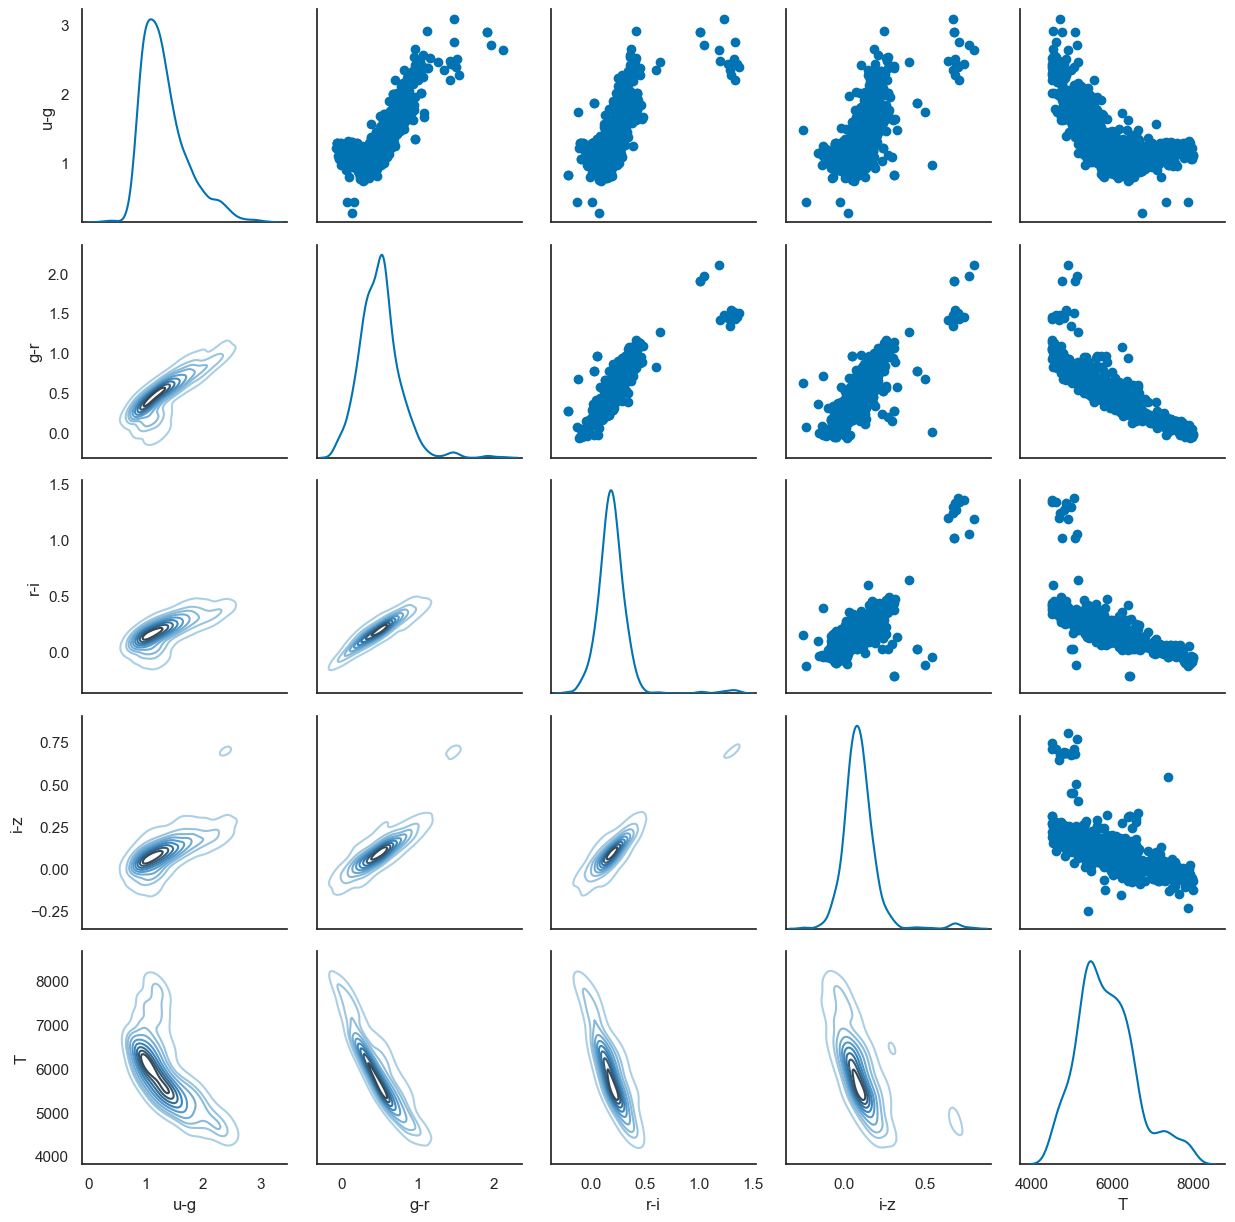

In [20]:
# Here I make a Pandas's DataFrame because this works nicely with Seaborn
df = pd.DataFrame(X[0:1000, :], columns=['u-g', 'g-r', 'r-i', 'i-z', 'T'])
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

There is plenty of co-linearity in this data. Let me now assume that we can write

$$T = \theta_0 + \theta_1 (u-g) + \theta_2 (g-r) + \theta_3 (r-i) + \theta_5 (i-z) $$

and we want to constrain $\theta$.

Your task now is to do this for different types of regression. I will show first how to do it for linear regression and then we'll create a simple set of functions to repeat this

In [21]:
# from astroML.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [25]:
# This is the standard setup for fitting. I use temperatures in units of 10^4 K to avoid enormous numbers in the fit
model = LinearRegression(fit_intercept=True)
res = model.fit(M, T/1e4)
Tpred = model.predict(M)
residuals = Tpred*1e4-T
relative_residuals = residuals/T
c = list(res.coef_)
print(" The best-fit model is:\n   T = {0:.3f}+ {1:.3f} (u-g) + {2:.3f} (g-r) + {3:.3f} (r-i) + {4:.3f} (i-z)".format(res.intercept_, c[0], c[1], c[2], c[3]))


 The best-fit model is:
   T = 0.690+ 0.025 (u-g) + -0.261 (g-r) + -0.083 (r-i) + 0.035 (i-z)


In [26]:
res.intercept_

0.68993545

## A common structure

This structure you see here:

- Create a model
- Fit the data
- Calculate the predicted values

Is a very standard way to do machine learning in Python (at least with `sklearn`). We will do two regularised regression methods next, but first a short aside about visualisation

Now for a first go at the residual plot. This just creates two scatter plots with the residuals on the left and the relative residuals on the right. This is not a very good plot.

Text(0, 0.5, '$(T_{pred}-T)/T$')

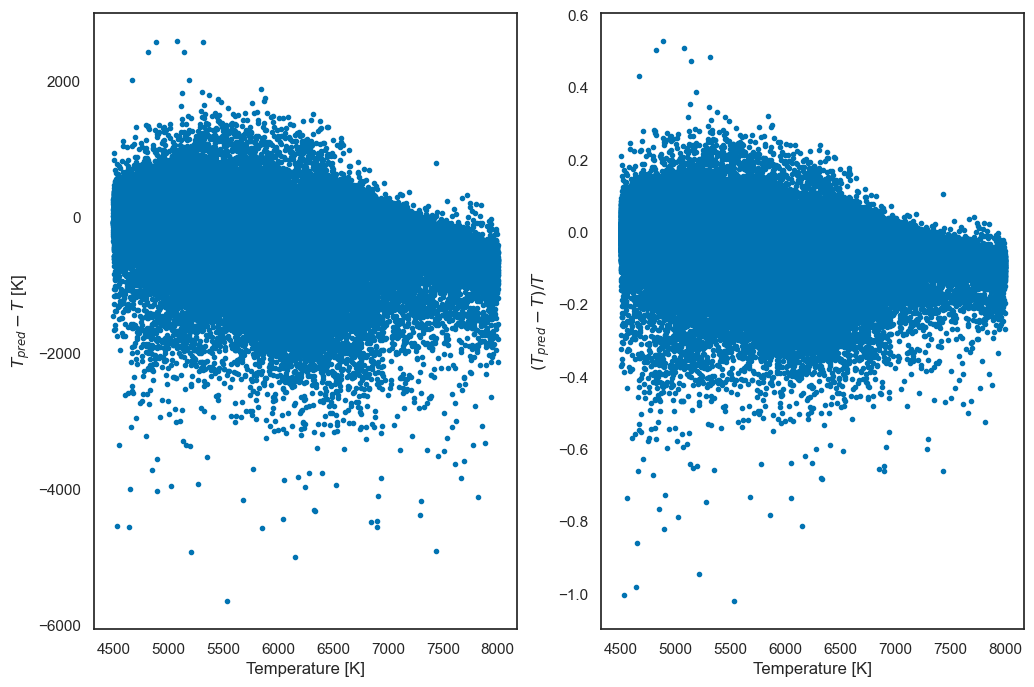

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
axes[0].scatter(T, residuals, marker='.')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel(r'$T_{pred}-T$ [K]')

axes[1].scatter(T, relative_residuals, marker='.')
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel(r'$(T_{pred}-T)/T$')


Now what is bad about these figures? There are a few problems:

 1. They obscure the data. There are so many datapoints you can't see any structure.
 2. They actually provide very little information as such.
 3. The labels are arguably too small.
 4. My impression is that the aspect ratio is wrong for the data.
 5. The residuals should be symmetric around zero if all is well, but as the y-axis is asymmetric it is hard to judge whether the residuals are symmetric around zero

These two figures also provide very similar information. Although it is not exactly the same, I'll just improve the relative residual plot on the left.

So how can we tackle these issues?

**Obscured data**: This is relatively easy. We can use transparency of the points (that is the solution I'll use below), and we can obscure the individual data points more by creating a 2D histogram or a 2D kernel density plot, but since that is the next lecture I won't do that.

**Little information**: With so much data it is useful to overplot, say the median trend line on the data and possibly a regression fit to the data to see whether there is a slope to data, or to colour the points by some colour.  Of course to carry out this properly we should look at the trend of residuals with the various colours & there are a bunch of diagnostic plots one can use for regression models.

The median of a value Y in a small window in x is called the running or rolling median or sometimes the median trend line. Calculation of a running median for large data can be a bit slow but you can speed things up if your data is sorted or various other situations. Below I calculate it in a very simple way but there are also other things one can do.

**Labels**: Straightforward fix.

**Aspect ratio**: This is easily fixed, and in particular for us because we will now only plot one panel.

**Y-range**: We just set the y-limits to be symmetric around zero

In [28]:
def running_median(x, y, N=10, binsize=None):
    """Calculate the median in N windows, or windows of size binsize.

    This ignores all edge effects - caveat emptor
    """

    if binsize is not None:
        bins = np.arange(x.min(), x.max(), binsize)
        N = len(bins)
    else:
        bins = np.linspace(x.min(), x.max(), N)
        binsize = bins[1]-bins[0]

    # This finds the bins that each x should go in.
    # This is convenient for expanding the routine to accept other functions.
    idx  = np.digitize(x, bins)

    r_med = [np.median(y[idx==k]) for k in range(N)]
    # I also want the x-positions in the bins. I use mean for that
    x_bins = [np.mean(x[idx==k]) for k in range(N)]

    return np.array(x_bins), np.array(r_med), bins

In [29]:
x_m_regular, med_regular, bins = running_median(T, relative_residuals, binsize=100)

/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3502: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


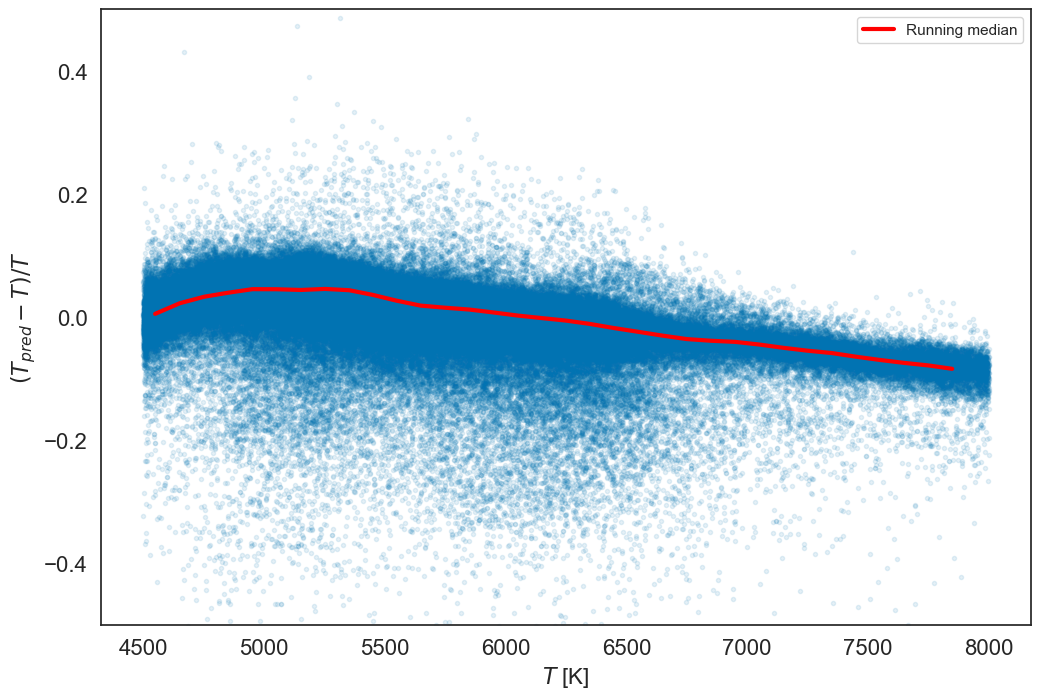

In [30]:
# I'll still use the subplots notation so that it is easy to modify if I want to add more panels.

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
ax.scatter(T, relative_residuals, marker='.', alpha=0.1)
ax.plot(x_m_regular, med_regular, lw=3, color='red', label='Running median')

ax.set_xlabel(r'$T$ [K]', fontsize=16)
ax.set_ylabel(r'$(T_{pred}-T)/T$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(-0.5,0.5)
plt.legend()


This is better but still not very good - what would you like to improve here?

## Other types of regression

Ok, now it is time to look at other types of regression method. Here we will try the **ridge** and **LASSO** regression techniques. But through this we will also introduce a useful concept in `sklearn` called **pipelines**.

To be efficient it is useful to wrap up these tasks into functions - and also to switch to what is known as pipelines. 

## What is a pipeline?

In machine learning we frequently have situations where we might do (it can be simpler or more complex than this depending on the situation): 

1. Scale the data to have a unit variance and zero mean.
2. Rotate the data to new coordinates that are "better behaved".
3. Fit a model to the resulting transformed data.

We want to swap out one of these steps with another one, or skip one and we might need to optimise an intermediate step in some way. Furthermore this is conceptually a "single" operation. It would therefore be convenient to encapsulate this into one object that can be passed around more easily. 

Enter pipelines. A pipeline in the `sklearn` lingo is a chain of methods. The first $N-1$ methods must be methods that can transform the data, for instance to scale them, while the last method in the chain can be a classifier. Technically the transforming methods must define `fit` and `transform` functions, while the final method may only provide a `fit` function.  

So the sequence of three steps listed above could be schematically illustrated as follows

![pipeline.png](pipeline.png)

where I have chosen three example methods for the different steps. 

While pipelines can be very convenient, I am not recommending you to start with them. It is usually a  better idea to develop each component separately, to understand the consequences of parameter choices. But when you understand what you are doing, then coupling the different steps together into a pipeline can be very convenient and help you organise your code and thinking. 

## Setting up a pipeline

To set up a pipeline you first need to import the necessary code - this lives in `sklearn.pipeline`. You will often see the use of a convenience function called `make_pipeline` and I often use this myself if I use pipelines, but it obscures some of the functionality so I think it is better to use the `Pipeline` object directly as follows:

```
from sklearn.pipeline import Pipeline
```

We then create the pipeline object by creating a list of methods. Here is an example of 
```
    P = Pipeline(steps=[ ("scaler", StandardScaler(with_mean=False)),
                         ("pca", PCA()),
                         ("regressor", Ridge(alpha=0.1, fit_intercept=True))])
```

You can then use the pipeline method as shown below.

The advantage of this way of creating pipeline objects is that you can access the individual steps using the name you defined ("scaler", "pca" and "regressor" here), if you use `make_pipeline` you are forced to use its naming convention which is inflexible at times. For instance when you want to optimise parameters of the pipeline but you vary the ingredients, it is convenient to use a fixed naming scheme - but do not try to be too flexible, that is unlikely to pay off.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.pipeline

In [ ]:
P_example = Pipeline(steps=[ ("scaler", StandardScaler(with_mean=False)),
                         ("pca", PCA()),
                         ("regressor", Ridge(alpha=0.1, fit_intercept=True))])

In [ ]:
def create_pipeline(method, verbose=True):
    """Create a pipeline for fitting a regressor (and many more models actually)

    Arguments:
        method: a method to use for the fitting of the data.

    Return:
        P: a pipeline object. P[0] will contain the standard scaler, P[1] the fit object.

    """

    P = Pipeline( steps=[("scaler", StandardScaler(with_mean=False)),
                         ("regressor", method)], verbose=verbose)

    # If you want to use the make_pipeline the code would be something like the below, 
    # but note that with this the other routines also need to be modified to access the 
    # correct part of the pipeline.
    #
    #P = make_pipeline(
    #    StandardScaler(with_mean=False),
    #    method, verbose=verbose)

    return P

def run_fit(P, M, y):
    """Fit data with pipeline P

    Arguments:
        P: The pipeline
        M: The design matrix
        y: The response variables

    Returns:
        res: a fit object - the content depends on the model used in the pipeline

    """
    # If you want to explicitly decide what the pipeline steps do, you 
    # can use this, but it is not very flexible, but it shows explicly
    # what is being done
    #
    #    res = P[1].fit(P[0].fit_transform(M), T/1e4)
    
    res = P.fit(M, T/1e4)


    # Here I am relying on the structure of the pipeline created above.
    fitres = P['regressor']
    scales = P['scaler'].scale_
    
    # The StandardScaler scales the data - this corrects back.
    fitres.coef_ = fitres.coef_/scales

    return fitres

def calculate_residuals(P, M, y_true):
    """Calculate the residuals of a fit

    Arguments:
       P: the pipeline object
       M: the design matrix
       y_true: the true values

    Returns:
       y_pred: the predicted values
       residuals: the residuals calculated as y_predicted-y_true
       relative_residuals: the residuals divided by y_true

    """
    y_pred = P['regressor'].predict(M)
    residuals = y_pred-y_true
    # This works badly if y_true is zero...
    relative_residuals = residuals/y_true

    return y_pred, residuals, relative_residuals

def report_linear_regression_coefficients(res):
    """This reports the linear regression coefficient

    This particular code is very specialised and needs modifications for any
    other situation
    """

    # Note that the intercept for ridge regression is somewhat hidden..
    c = [res.intercept_]
    [c.append(coeff) for coeff in res.coef_]

    print(" The best-fit model is:\n   T = {0:.3f}+ {1:.3f} (u-g) + {2:.3f} (g-r) + {3:.3f} (r-i) + {4:.3f} (i-z)".format(c[0], c[1], c[2], c[3], c[4]))



## Testing out Ridge and LASSO regression.

In linear regression we fit models of the type
$$
\hat{y}_i = \theta_0 + \sum_{j=1}^p \theta_j x_{ij},
$$
where $\theta_i$ are the _parameters_ of the model, $y_i$ are the model outputs or response variables and $x_{ij}$ are the input or independent variables. In standard linear regression we minimize the sum of squares
$$
\mathrm{RSS} = \sum_i \left(y_i - \hat{y}_i\right)^2.
$$

But when there are many outliers, the parameters of the model can go very far from the correct values - they are sensitive to outliers. To reduce this sensitivity, we regularise the fit. We do that my adding a Lagrange multiplier to the quantity we try to minimise, so we minimise
$$
\mathrm{RSS} = \sum_i \left(y_i - \hat{y}_i\right)^2 + \lambda f(\theta),
$$
where $f(\theta) = \sum_j \theta_j^2$ in **Ridge regression** and $f(\theta) = \sum_j |\theta_j|$ in **LASSO regression**.

They are particularly useful for avoiding large deviations in the fits when small numbers are used, and you will frequently find them used as parts of a larger model. With the framework above - they are easy to fit, but note that `sklearn` uses `alpha` for setting `lambda`...

In [ ]:
# Ridge regression:
method_ridge = Ridge(alpha=0.1, fit_intercept=True)

P = create_pipeline(method_ridge)
# This does the actual fit.
y = T/1e4
res = run_fit(P, M, y)
Tpred, residuals, relative_residuals = calculate_residuals(P, M, y)
# If you want residuals in Kelvin, then you need to multiply by 10^4

report_linear_regression_coefficients(res)

In [ ]:

# LASSO regression:
method_lasso = Lasso(alpha=1e-4, fit_intercept=True)

P = create_pipeline(method_lasso)
# This does the actual fit.
y = T/1e4
res = run_fit(P, M, y)
Tpred, residuals, relative_residuals = calculate_residuals(P, M, y)
# If you want residuals in Kelvin, then you need to multiply by 10^4

report_linear_regression_coefficients(res)

### Task:

Try different values for the `alpha` parameters of LASSO and Ridge Regression and see what happens to the coefficients.